In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error

In [36]:
data=pd.read_csv('allgws.csv', index_col=False)

In [37]:
data.insert(0, 'playerid', 0)

In [38]:
for i in range(len(data)):
    data['playerid'][i]=data['name'][i].split('_')[2]

c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
for i in range(len(data)):
    if(data['GW'][i]>38):
        data['GW'][i]=data['GW'][i]-9

c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
data = data.drop(labels=['bps','bonus','element', 'own_goals','transfers_balance', 'penalties_missed', 'red_cards','penalties_saved','selected','transfers_in', 'transfers_out','kickoff_time', 'fixture'], axis=1)

In [41]:
data[data['GW']==38].name.tolist()

['Aaron_Connolly_534',
 'Aaron_Cresswell_376',
 'Aaron_Lennon_430',
 'Aaron_Mooy_516',
 'Aaron_Ramsdale_494',
 'Aaron_Wan-Bissaka_122',
 'Abd-Al-Ali Morakinyo Olaposi_Koiki_596',
 'Abdoulaye_Doucouré_368',
 'Adalberto_Peñaranda_648',
 'Adama_Traoré_417',
 'Adam_Idah_538',
 'Adam_Lallana_195',
 'Adam_Masina_355',
 'Adam_Smith_63',
 'Adam_Webster_493',
 'Addji Keaninkin Marc-Israel_Guehi_545',
 'Ademola_Lookman_155',
 'Adrian_Mariappa_356',
 'Adrián_San Miguel del Castillo_526',
 'Ahmed_El Mohamady_22',
 'Ainsley_Maitland-Niles_4',
 'Akin_Famewo_552',
 'Albian_Ajeti_514',
 'Alexander_Tettey_289',
 'Alexandre Nascimento_Costa Silva_387',
 'Alexandre_Jankewitz_649',
 'Alexandre_Lacazette_12',
 'Alexis_Mac Allister_627',
 'Alexis_Sánchez_240',
 'Alex_Cochrane_666',
 'Alex_Iwobi_17',
 'Alex_McCarthy_318',
 'Alex_Oxlade-Chamberlain_193',
 'Alfie_Lewis_651',
 'Alfie_Whiteman_543',
 'Alireza_Jahanbakhsh_50',
 'Alisson_Ramses Becker_189',
 'Allan_Saint-Maximin_500',
 'Andreas_Christensen_108',
 

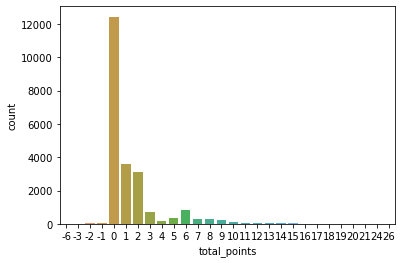

In [42]:
sns.countplot(data['total_points'])

In [43]:
idlist = list(data['playerid'].unique())

# Ignoring players who scored <1pt in the season

In [44]:
ptsdict = {}
for i in range(669):
    if(data[data['playerid']==i]['total_points'].sum()>0):
        ptsdict[i]=data[data['playerid']==i]['total_points'].sum()

In [45]:
for i in data['playerid']:
    if(i not in ptsdict.keys()):
        data=data[data['playerid']!=i]

In [46]:
playerlist=list(data['playerid'].unique())

In [47]:
for i in playerlist:
    if len(data[data['playerid']==i]) !=39:
        firstgw=data[data['playerid']==i].iloc[0]['round']
        name=data[data['playerid']==i].iloc[0]['name']
        for gw in range(1,firstgw):
            row = {'playerid':i, 'name':name,'assists':0,'clean_sheets':0,'creativity':0,
                   'goals_conceded':0,'goals_scored':0,'ict_index':0,'influence':0,'minutes':0,
                   'opponent_team':0,'round':gw,'saves':0,'team_a_score':0,'team_h_score':0,
                   'threat':0,'total_points':0,'value':0,'was_home':True,'yellow_cards':0,'GW':gw}
            data=data.append(row, ignore_index=True)


In [48]:
idnamedict = {}
for i in sorted(playerlist):
    if(i<=21):
        idnamedict[i]=1
    elif(i>=22 and i<=36):
        idnamedict[i]=2
    elif(i>=37 and i<=57):
        idnamedict[i]=3
    elif(i>=58 and i<=82):
        idnamedict[i]=4
    elif(i>=83 and i<=102):
        idnamedict[i]=5
    elif(i>=103 and i<=121):
        idnamedict[i]=6
    elif(i==122):
        idnamedict[i]=12
    elif(i>=123 and i<=140):
        idnamedict[i]=7
    elif(i>=141 and i<=158):
        idnamedict[i]=8
    elif(i>=159 and i<=180):
        idnamedict[i]=9
    elif(i>=181 and i<=201):
        idnamedict[i]=10
    elif(i>=202 and i<=222):
        idnamedict[i]=11
    elif(i>=223 and i<=250):
        idnamedict[i]=12
    elif(i==265):
        idnamedict[i]=9
    elif(i>=251 and i<=271):
        idnamedict[i]=13
    elif(i>=272 and i<=290):
        idnamedict[i]=14
    elif(i>=291 and i<=303):
        idnamedict[i]=15
    elif(i>=304 and i<=328):
        idnamedict[i]=16
    elif(i>=329 and i<=352):
        idnamedict[i]=17
    elif(i>=353 and i<=375):
        idnamedict[i]=18
    elif(i>=376 and i<=400):
        idnamedict[i]=19
    elif(i>=401 and i<=420):
        idnamedict[i]=20
    elif i == 421 or i == 502 or i == 516 == i==534 or i==493 or i==475:
        idnamedict[i]=4
    elif i==423 or i==471 or i==501:
        idnamedict[i]=15
    elif i==428 or i==445 or i==452 or i==458 or i==470 or i==465:
        idnamedict[i]=2
    elif i==431 or i==432 or i==460 or i==459 or i==463 or i==506:
        idnamedict[i]=6
    elif i==437:
        idnamedict[i]=16
    elif i==448 or i==517:
        idnamedict[i]=9
    elif i==447 or i==451:
        idnamedict[i]=5
    elif i==466 or i==498 or i==500 or i==554:
        idnamedict[i]=13
    elif i==618 or i==549:
        idnamedict[i]=12
    elif i==469 or i==486 or i==541 or i==488:
        idnamedict[i]=1
    elif i==478 or i==511 or i==496:
        idnamedict[i]=8
    elif i==457:
        idnamedict[i]=19
    elif i==494 or i==505:
        idnamedict[i]=3
    elif i==528:
        idnamedict[i]=20
    elif i==468 or i==503:
        idnamedict[i]=7
    elif i==523:
        idnamedict[i]=17
    elif i==525 or i==439:
        idnamedict[i]=18
    elif i==476:
        idnamedict[i]=3
    elif i==443:
        idnamedict[i]=11
    else:
        idnamedict[i]=-1

In [49]:
data.insert(0, 'team', -1)

In [50]:
data['team']=data['playerid']
data['team']=data['team'].map(idnamedict)

In [52]:
data.team.value_counts()

-1     4398
 4     1026
 12     950
 6      875
 18     836
 17     836
 11     818
 1      818
 13     798
 9      798
 19     798
 14     722
 10     722
 7      722
 5      722
 2      684
 16     684
 3      684
 8      684
 20     646
 15     494
Name: team, dtype: int64

In [17]:
data=data.sort_values(by=['GW','playerid'])

In [18]:
teamdict={1:'ARS', 2:'AVL',3:'BOU', 4:'BHA', 5:'BUR', 6:'CHE', 7:'CRY', 8:'EVE', 9:'LEI', 10:'LIV', 11:'MCI', 12:'MUN',
          13:'NEW', 14:'NOR', 15:'SHU', 16:'SOU', 17:'TOT', 18:'WAT', 19:'WHU', 20:'WOL'}
teamfdr={1:3, 2:2,3:2, 4:2, 5:3, 6:4, 7:2, 8:3, 9:3, 10:5, 11:5, 12:4,
          13:2, 14:1, 15:2, 16:3, 17:4, 18:2, 19:2, 20:3}

data['fdr']=data['opponent_team']
data['fdr']=data['fdr'].map(teamfdr)

In [19]:
def calcForm(scores:list)->int:
    weights=[1,2,3,4,5]
    return sum([x*y for x,y in zip(scores,weights)])

# GW 18-24 LIV-WHU

In [20]:
data24=data[data['GW']==24]
data.drop(data[data['GW']==24].index, inplace=True)

In [21]:
liv=data24.query('opponent_team == 19 and team==10')
data24.drop(data24[(data24['team']==10) & (data24['opponent_team']==19)].index, inplace=True)
liv['GW']=18
whu=data24.query('opponent_team == 10 and team==19')
data24.drop(data24[(data24['team']==19) & (data24['opponent_team']==10)].index, inplace=True)
whu['GW']=18

c:\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [22]:
data=data.append(whu, ignore_index=True)
data=data.append(liv, ignore_index=True)
data=data.append(data24, ignore_index=True)

# GW 30-28 MCI-ARS

In [23]:
data2=data[data['GW']==30]
data.drop(data[data['GW']==30].index, inplace=True)

In [24]:
mci=data2.query('opponent_team == 1 and team==11')
data2.drop(data2[(data2['team']==11) & (data2['opponent_team']==1)].index, inplace=True)
mci['GW']=28
ars=data2.query('opponent_team == 11 and team==1')
data2.drop(data2[(data2['team']==1) & (data2['opponent_team']==11)].index, inplace=True)
ars['GW']=28

c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
data=data.append(ars, ignore_index=True)
data=data.append(mci, ignore_index=True)
data=data.append(data2, ignore_index=True)

# GW 30-28 AVL-SHU

In [26]:
data30=data[data['GW']==30]
data.drop(data[data['GW']==30].index, inplace=True)

In [27]:
shu=data30.query('opponent_team == 2 and team==15')
data30.drop(data30[(data30['team']==15) & (data30['opponent_team']==2)].index, inplace=True)
shu['GW']=28
avl=data30.query('opponent_team == 15 and team==2')
data30.drop(data30[(data30['team']==2) & (data30['opponent_team']==15)].index, inplace=True)
avl['GW']=28

c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
data=data.append(avl, ignore_index=True)
data=data.append(shu, ignore_index=True)
data=data.append(data30, ignore_index=True)

## GW 29 has duplicate MCIvARS

In [29]:
data.drop(data[(data['team']==1) & (data['opponent_team']==11) & (data['GW']==29)].index, inplace=True)
data.drop(data[(data['team']==11) & (data['opponent_team']==1) & (data['GW']==29)].index, inplace=True)

In [30]:
for gw in range(1,39):
    print("GW", gw,len(data[data['GW']==gw]))

GW 1 515
GW 2 515
GW 3 515
GW 4 515
GW 5 515
GW 6 515
GW 7 515
GW 8 515
GW 9 515
GW 10 515
GW 11 515
GW 12 515
GW 13 515
GW 14 515
GW 15 515
GW 16 515
GW 17 515
GW 18 506
GW 19 515
GW 20 515
GW 21 515
GW 22 515
GW 23 515
GW 24 527
GW 25 515
GW 26 515
GW 27 515
GW 28 475
GW 29 528
GW 30 559
GW 31 521
GW 32 522
GW 33 522
GW 34 522
GW 35 522
GW 36 525
GW 37 525
GW 38 525


In [31]:
data.insert(0, 'form', 0)

In [32]:
pointsdict={}
for i in playerlist:
    ptslist=[]
    selection=data[data['playerid']==i]
    print("-----------ID",i)
    for gw in range(1,38):
        print("GW",gw,selection[selection['GW']==gw].iloc[0]['total_points'])
    #print(ptslist)

-----------ID 376
GW 1 0
GW 2 0
GW 3 0
GW 4 0
GW 5 0
GW 6 14
GW 7 7
GW 8 2
GW 9 0
GW 10 2
GW 11 0
GW 12 1
GW 13 1
GW 14 14
GW 15 0
GW 16 0
GW 17 6
GW 18 1
GW 19 0
GW 20 0
GW 21 5
GW 22 2
GW 23 2
GW 24 0
GW 25 1
GW 26 1
GW 27 1
GW 28 1
GW 29 2
GW 30 1
GW 31 1
GW 32 1
GW 33 1
GW 34 2
GW 35 6
GW 36 2
GW 37 2
-----------ID 430
GW 1 1
GW 2 1
GW 3 0
GW 4 2
GW 5 0
GW 6 1
GW 7 0
GW 8 1
GW 9 1
GW 10 0
GW 11 0
GW 12 0
GW 13 0
GW 14 1
GW 15 2
GW 16 1
GW 17 0
GW 18 1
GW 19 0
GW 20 0
GW 21 0
GW 22 1
GW 23 1
GW 24 0
GW 25 0
GW 26 0
GW 27 0
GW 28 0
GW 29 1
GW 30 0
GW 31 0
GW 32 0
GW 33 0
GW 34 0
GW 35 0
GW 36 0
GW 37 0
-----------ID 516
GW 1 0
GW 2 1
GW 3 0
GW 4 0
GW 5 1
GW 6 3
GW 7 2
GW 8 3
GW 9 -2
GW 10 0
GW 11 0
GW 12 0
GW 13 2
GW 14 2
GW 15 8
GW 16 2
GW 17 2
GW 18 2
GW 19 2
GW 20 11
GW 21 2
GW 22 0
GW 23 2
GW 24 10
GW 25 2
GW 26 2
GW 27 2
GW 28 2
GW 29 3
GW 30 0
GW 31 3
GW 32 1
GW 33 6
GW 34 1
GW 35 2
GW 36 1
GW 37 1
-----------ID 494
GW 1 2
GW 2 4
GW 3 1
GW 4 1
GW 5 3
GW 6 10
GW 7 2
GW 8 2
GW 9 

IndexError: single positional indexer is out-of-bounds

In [ ]:
for gw in range(5,34):
    for i in playerlist:
        x=data[data['GW']==gw]
        row=x[x['playerid']==i]
        row['form']=1

In [ ]:
avgs = {}
gwrange = [1,2,3,4,5]
for i in playerlist:
    scorelist=[]
    for g in gwrange:
        temp=data[data['GW']==g]
        temp=temp[temp['playerid']==i]
        scorelist.append(int(temp['total_points']))
    avgs[i]=calcRollingAvg(scorelist)

# Train model

In [ ]:
train=data[data['playerid']==191]

In [ ]:
feature_cols=['playerid', 'assists', 'bonus', 'bps', 'clean_sheets',
       'creativity', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'minutes', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'team_a_score', 'team_h_score', 'threat', 'value',
       'was_home', 'yellow_cards', 'GW', 'fdr']

In [ ]:
ytrain=train['total_points']

In [ ]:
del train['total_points']
xtrain=train

In [ ]:
xtest=xtrain.tail(5)
ytest=ytrain.tail(5)

In [ ]:
xtrain=xtrain[:-5]
ytrain=ytrain[:-5]

In [ ]:
reg = ensemble.RandomForestRegressor()
reg.fit(xtrain[feature_cols], ytrain)

mse = mean_squared_error(ytest, reg.predict(xtest[feature_cols]))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

In [ ]:
plt.plot(reg.feature_importances_, feature_cols)

In [ ]:
xtest

In [ ]:
reg.predict(xtest[0])

In [ ]:
sorted(data[data['GW']==29].name.tolist())

In [ ]:
data[data['GW']==28]

In [ ]:
for x in range(20):
    print(data[(data['GW']==29)& (data['team']==x)])